In [1]:
import gdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://drive.google.com/file/d/16Udx3Tog27g-7l-LUg9wDdlQ4c9_X3_6/view?usp=share_link"
opt = "train_data"
gdown.download(url, opt, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=16Udx3Tog27g-7l-LUg9wDdlQ4c9_X3_6
To: C:\Users\Asus\train_data
100%|█████████████████████████████████████████████████████████████████████████████| 4.72M/4.72M [00:01<00:00, 4.34MB/s]


'train_data'

In [3]:
url = "https://drive.google.com/file/d/1w6yq_HaazCdnGddsgHQ9CzY9BrBo7Wbl/view?usp=share_link"
opt = "test_data"
gdown.download(url, opt, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1w6yq_HaazCdnGddsgHQ9CzY9BrBo7Wbl
To: C:\Users\Asus\test_data
100%|█████████████████████████████████████████████████████████████████████████████| 1.83M/1.83M [00:00<00:00, 3.34MB/s]


'test_data'

In [4]:
import os
os.makedirs("/train_data_set", exist_ok=True)

In [5]:
from zipfile import ZipFile

with ZipFile("train_data", "r") as train_obj:
    train_obj.extractall("train_data_set")

In [6]:
import os
os.makedirs("/test_data_set", exist_ok=True)

In [7]:
from zipfile import ZipFile

with ZipFile("test_data", "r") as train_obj:
    train_obj.extractall("test_data_set")

In [8]:
import pandas as pd

In [9]:
train_data = pd.read_csv("train_data_set/train.csv")

In [10]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
[train_data[i].dtype for i in train_data.columns]

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64')]

In [13]:
for i in train_data.columns:
    if train_data[i].dtype == "O":
        print(i)

Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years


In [14]:
for i in ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]:
    print(train_data[i].unique())
    print("_________")

['F' 'M']
_________
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
_________
['A' 'C' 'B']
_________
['2' '4+' '3' '1' '0']
_________


In [15]:
import seaborn as sns

In [16]:
train_data.groupby(["Stay_In_Current_City_Years"])['Purchase'].median().sort_values(ascending=False)

Stay_In_Current_City_Years
2     8072.0
4+    8052.0
3     8047.0
1     8041.0
0     8025.0
Name: Purchase, dtype: float64

In [17]:
train_data.groupby(["Product_Category_1"])['Purchase'].median().sort_values(ascending=False)

Product_Category_1
10    19197.0
7     16700.0
15    16660.0
6     16312.0
16    16292.5
1     15245.0
14    14654.0
9     14388.5
2     12728.5
3     10742.0
17    10435.5
8      7905.0
5      6912.0
11     4611.0
18     3071.0
4      2175.0
12     1401.0
13      755.0
20      368.0
19       37.0
Name: Purchase, dtype: float64

In [18]:
train_data.groupby(["Product_Category_2"])['Purchase'].median().sort_values(ascending=False)

Product_Category_2
10.0    16341.0
2.0     15241.0
3.0     12714.5
6.0     11611.0
4.0     10681.0
5.0      9892.0
16.0     9832.0
15.0     8857.0
8.0      8675.0
17.0     8314.5
18.0     7991.0
13.0     7981.0
11.0     7180.0
7.0      7058.0
14.0     7026.0
12.0     7021.0
9.0      6955.0
Name: Purchase, dtype: float64

In [19]:
train_data.groupby(["Product_Category_3"])['Purchase'].median().sort_values(ascending=False)

Product_Category_3
3.0     15288.0
8.0     15204.0
6.0     15174.5
10.0    13051.0
13.0    12612.0
15.0    12011.0
16.0    11916.0
11.0    11912.0
5.0     11767.5
18.0    11589.0
17.0    11431.5
9.0     11390.0
4.0      9850.0
14.0     8653.0
12.0     8370.0
Name: Purchase, dtype: float64

In [20]:
train_data.groupby(["Gender"])['Purchase'].median().sort_values(ascending=False)

Gender
M    8098.0
F    7914.0
Name: Purchase, dtype: float64

In [21]:
train_data.groupby(["Age"])['Purchase'].median().sort_values(ascending=False)

Age
51-55    8130.0
55+      8105.5
36-45    8061.0
46-50    8036.0
26-35    8030.0
18-25    8027.0
0-17     7986.0
Name: Purchase, dtype: float64

In [22]:
train_data.groupby(["Product_Category_2"])['Purchase'].sum()

Product_Category_2
2.0     670303864
3.0      32402777
4.0     262295485
5.0     236844899
6.0     189417477
7.0       4309812
8.0     658392656
9.0      41428000
10.0     47619084
11.0    126366165
12.0     38560412
13.0    101975384
14.0    391556939
15.0    392067176
16.0    445339722
17.0    125495400
18.0     25906260
Name: Purchase, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

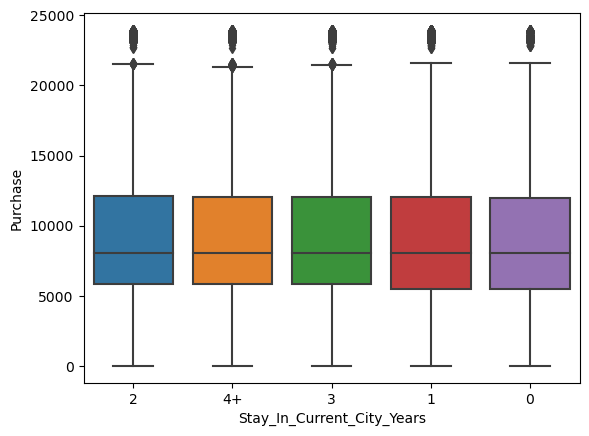

In [23]:
sns.boxplot(data = train_data, x = "Stay_In_Current_City_Years", y = "Purchase")

In [24]:
train_data.groupby(["City_Category"])['Purchase'].median().sort_values(ascending=False)

City_Category
C    8585.0
B    8005.0
A    7931.0
Name: Purchase, dtype: float64

In [25]:
train_data.groupby(["Occupation"])['Purchase'].median().sort_values(ascending=False)

Occupation
17    8635.0
12    8569.0
15    8513.0
8     8419.5
14    8122.0
13    8090.5
5     8080.0
16    8070.0
7     8069.0
6     8050.0
4     8043.0
11    8041.5
10    8012.5
3     8008.0
0     8001.0
1     7966.0
18    7955.0
2     7952.0
20    7903.5
9     7886.0
19    7840.0
Name: Purchase, dtype: float64

In [26]:
train_data.drop(columns=['User_ID', 'Product_ID'], axis = 1, inplace=True)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [28]:
train_data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
train_data['Age'] = train_data['Age'].map({'0-17' : 0, '55+' : 6, '26-35' : 2, '46-50' : 4, '51-55' : 5, '36-45' : 3, '18-25' : 1})

In [30]:
train_data['Stay_In_Current_City_Years'] = train_data['Stay_In_Current_City_Years'].map({'2' : 2, '4+' : 4, '3' : 3, '1' : 1, '0': 0})

In [31]:
train_df = pd.get_dummies(data=train_data, columns=['Gender', 'City_Category'], drop_first=True)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         550068 non-null  int64  
 1   Occupation                  550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int64  
 3   Marital_Status              550068 non-null  int64  
 4   Product_Category_1          550068 non-null  int64  
 5   Product_Category_2          376430 non-null  float64
 6   Product_Category_3          166821 non-null  float64
 7   Purchase                    550068 non-null  int64  
 8   Gender_M                    550068 non-null  uint8  
 9   City_Category_B             550068 non-null  uint8  
 10  City_Category_C             550068 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 35.1 MB


In [33]:
train_df['Product_Category_2'].fillna(train_df['Product_Category_2'].mode()[0], inplace=True)
train_df['Product_Category_3'].fillna(train_df['Product_Category_3'].mode()[0], inplace=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         550068 non-null  int64  
 1   Occupation                  550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int64  
 3   Marital_Status              550068 non-null  int64  
 4   Product_Category_1          550068 non-null  int64  
 5   Product_Category_2          550068 non-null  float64
 6   Product_Category_3          550068 non-null  float64
 7   Purchase                    550068 non-null  int64  
 8   Gender_M                    550068 non-null  uint8  
 9   City_Category_B             550068 non-null  uint8  
 10  City_Category_C             550068 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 35.1 MB


In [35]:
train_df.iloc[:3]

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,0,10,2,0,3,8.0,16.0,8370,0,0,0
1,0,10,2,0,1,6.0,14.0,15200,0,0,0
2,0,10,2,0,12,8.0,16.0,1422,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['Purchase']),
    train_df['Purchase'], test_size=0.3,  random_state=42)

In [43]:
X_train, y_train = (train_df.drop(columns=['Purchase']), train_df['Purchase'])

In [44]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [45]:
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = regression.predict(X_train)

In [47]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.13125112457440868